# <center> $k$-means Clustering </center>
<center> Corinne Jones, TA </center>
<center> DATA 558, Spring 2019 </center>

In [52]:
# Display all of the results.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Hide warnings
import warnings
warnings.filterwarnings('ignore')

## 1 Introduction
In this lab we are going to discuss $k$-means clustering. We will see how you can use $k$-means clustering for color quantization. By the end of this lab, you should:
- Be able to describe the $k$-means algorithm and implement it yourself
- Know how to use scikit-learn to perform $k$-means clustering

## 2 $k$-means
Recall that the idea behind clustering is that you have data points $x_1,\dots, x_n\in \mathbb{R}^d$ and want to group "similar" points together. There are no labels for the $x_j$'s, so this is an "unsupervised learning" task. It can be useful for exploratory data analysis.

In $k$-means, the idea is that we want to group the data into $k$ clusters $C_1,\dots, C_k$, such that the sum of the squared distances of each point to the mean of its group is minimized. I.e., we want to minimize
$$ J(C_1,\dots, C_k) = \sum_{i=1}^k \sum_{x\in C_i} \|x-m_i\|^2_2,$$
where $m_i$ is the mean of cluster $C_i$.

The problem with the above objective function is that it is non-convex, and minimizing it is NP-hard. The $k$-means algorithm, described next, is guaranteed to converge to a stationary point, but it may not be the global minimum. 

The $k$-means algorithm works iteratively as follows:
- **Input**: Data points $x_1,\dots, x_n\in \mathbb{R}^d$ and number of clusters $k$
- Randomly partition the data into $k$ clusters
- While not converged:
    1. Compute the mean of each cluster: $m_i = \frac{1}{n_i} \sum_{x\in C_i} x$, where $n_i$ is the number of items in cluster $C_i$
    2. For each point $x_j$, find the nearest cluster: $\pi(x) = \arg\min_{1\leq i\leq k} \|x-m_i\|^2_2$
    3. Update the clusters according to step (2): $C_i = \{x: \pi(x) = i\}$
- **Output**: Clusters $C_1,\dots, C_k$

### 2.1 $k$-means on a simple example
Consider the following data:
$ x_1 = (0, 1), x_2 = (0, 2), x_3 = (10, 1), x_4 = (10, 3)$. Let's plot these points:


(-1, 12)

(-1, 12)

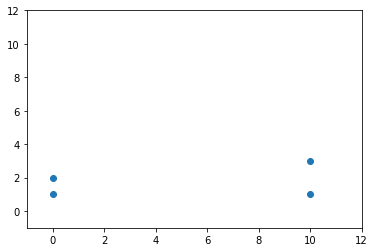

In [53]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

X = np.array([[0, 1], [0, 2], [10, 1], [10, 3]])
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(-1, 12)
plt.ylim(-1, 12)

It looks like there are two clusters, each with two points. Let's try performing $k$-means by hand. 

First we need to randomly partition the data points into clusters. For the purposes of this illustration, let's say $C_1 = \{(0,1), (10,3)\}$ and $C_2 = \{(0,2), (10,1)\}$. Here's how the $k$-means algorithm proceeds:


Step 1: Compute the mean of each cluster.

**Exercise 1** Compute the mean of each cluster. Then fill in the line in the code below.

 The picture at the moment looks like the following, where the circles are our data points and the $x$'s are the cluster centers:

(-1, 12)

(-1, 12)

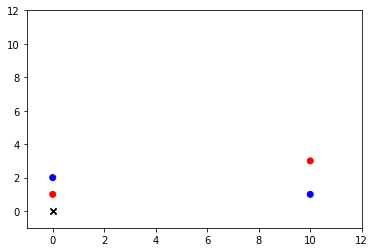

In [54]:
plt.scatter(X[:, 0], X[:, 1], c=['red', 'blue', 'blue', 'red'])
centers = np.array([[0, 0], [0, 0]])  # TO COMPLETE: Fill in the cluster centers here 
plt.scatter(centers[:, 0], centers[:, 1], marker='x', c='black')
plt.xlim(-1, 12)
plt.ylim(-1, 12)

Step 2: Compute the distance from each cluster mean to each point

**Exercise 2**: Perform step 2.
- Distance from $(0,1)$ to $m_1$: 
- Distance from $(0,1)$ to $m_2$: 
- Distance from $(10,3)$ to $m_1$: 
- Distance from $(10,3)$ to $m_2$: 
- Distance from $(0,2)$ to $m_1$: 
- Distance from $(0,2)$ to $m_2$: 
- Distance from $(10,1)$ to $m_1$: 
- Distance from $(10,1)$ to $m_2$: 

In [55]:
def dist(x,y):
    return np.linalg.norm(x-y)**2

m1 = np.array([5,1])
m2 = np.array([5,2.5])
dist(X[0],m1)
dist(X[0],m2)
dist(X[1],m1)
dist(X[1],m2)
dist(X[2],m1)
dist(X[2],m2)
dist(X[3],m1)
dist(X[3],m2)

25.0

27.250000000000004

25.999999999999996

25.25

25.0

27.250000000000004

28.999999999999996

25.25

Step 3: Update the clusters by assigning each point to the nearest cluster

**Exercise 3** Perform step 3.

$C_1 = \{(?,?), (?,?) \}$, $C_2 = \{(?,?), (?,?) \}$

Step 4: Compute the mean of each cluster.

**Exercise 4** Perform step 4. Then fill in the line in the code below.
\begin{align*}
m_1 &= (?, ?)\\
m_2 &= (?, ?)
\end{align*}

Now the picture looks like the following, where the circles are our data points and the $x$'s are the cluster centers:

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=['red', 'blue', 'red', 'blue'])
centers = np.array([[0, 0], [0, 0]])  # TO COMPLETE: Fill in the cluster centers here 
plt.scatter(centers[:, 0], centers[:, 1], marker='x', c='black')
plt.xlim(-1, 12)
plt.ylim(-1, 12)

Step 5: Find the distance from each cluster mean to each point.

**Exercise 5** Perform step 5.
- Distance from $(0,1)$ to $m_1$: 
- Distance from $(0,1)$ to $m_2$: 
- Distance from $(10,3)$ to $m_1$: 
- Distance from $(10,3)$ to $m_2$: 
- Distance from $(0,2)$ to $m_1$: 
- Distance from $(0,2)$ to $m_2$: 
- Distance from $(10,1)$ to $m_1$: 
- Distance from $(10,1)$ to $m_2$: 
   

Step 6: Update the clusters by assigning each point to the nearest cluster.

**Exercise 6** Perform step 6.
$C_1 = \{(?,?), (?,?) \}$, $C_2 = \{(?,?), (?,?) \}$

Step 7: Compute the mean of each cluster.
    
**Exercise 7** Perform step 7.
\begin{align*}
m_1 &= (?, ?)\\
m_2 &= (?, ?)
\end{align*}



At this point, the clusters and means are the same as last time. Therefore, the algorithm has converged and our final clusters are $C_1 = \{(10,3), (0,2) \}$, $C_2 = \{(0,1), (10,1) \}$. This is not how we would have intuitively created our clusters. 

With this clustering, the value of the $k$-means objective is 
\begin{align*}
J(C_1,C_2) &= \|(10,3)-(5, 2.5)\|^2+\|(0,2)-(5, 2.5)\|^2+\|(0,1)-(5, 1)\|^2+\|(10,1)-(5, 1)\|^2\\
&= (5^2+0.5^2) + (5^2+0.5^2) + (5^2 + 0^2) + (5^2+0^2) \\
&= 100.5
\end{align*}

Let's plot the results and then check them with sklearn.

(-1, 12)

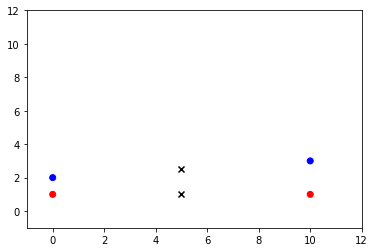

In [31]:
plt.scatter(X[:, 0], X[:, 1], c=['red', 'blue', 'red', 'blue'])
centers = np.array([[5, 2.5], [5, 1]])
plt.scatter(centers[:, 0], centers[:, 1], marker='x', c='black')
plt.xlim(-1, 12)
plt.ylim(-1, 12)

In [32]:
import sklearn.cluster

# We need to specify the number of clusters. I'm also inputting the initial cluster centers.
kmeans = sklearn.cluster.KMeans(n_clusters=2, init=np.array([[5, 2], [5, 1.5]]))
# Perform the clustering
kmeans.fit(X)
print('Cluster centers:\n', kmeans.cluster_centers_)
print('Objective function value:', kmeans.inertia_)

Cluster centers:
 [[5.  2.5]
 [5.  1. ]]
Objective function value: 100.5


/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


### 2.2 $k$-means++
If that was the end of the story, we might dismiss $k$-means as a clustering algorithm that's not very useful. Is there a way to improve the results, so that they align more with our intuition? Did the $k$-means algorithm find the global minimum in that example, or did it stop at a local minimum?

It turns out that the $k$-means algorithm did not find the global minimum in that example, which illustrates the problem of trying to minimize non-convex objectives. Instead of arbitrarily choosing the initial clusters, let's do something more sophisticated. This time, we'll do the following:
1. Choose one cluster center at random from the data points.
2. Compute the distance $D(x)$ from each data point $x$ to the nearest cluster that has already been chosen.
3. Select data point $x$ as the next cluster center with probability $\frac{D(x)^2}{\sum_y D(y)^2}$
4. Return to 2 and continue until $k$ cluster centers have been chosen.

$k$-means with this initialization method is called $k$-means++. Note that there is a random component to this initialization. Therefore, it can be beneficial to run $k$-means++ several times and then take the best clustering you get. There is some theory that limits how far a $k$-means++ clustering will be from the global optimum.

Let's try $k$-means++ on the example from above. First we need to randomly pick a cluster center from the data points. We can do this with numpy:

In [33]:
np.random.seed(0)  # Set the seed so everyone gets the same results

**Exercise 8** Perform steps 2 and 3 above by hand. Then fill in the probabilities in the code below.

We randomly chose the first point, $(0, 1)$ as the first center. Now we need to compute the distance from every other point to this point:
- Distance from $(0, 2)$ to $(0, 1)$: 
- Distance from $(10, 1)$ to $(0, 1)$: 
- Distance from $(10, 3)$ to $(0, 1)$:

Therefore, we will select $(0, 2)$ as the other cluster center with probability ??. Similarly, we will select $(10, 1)$ as the other cluster center with probability ?? and $(10, 3)$ as the other cluster center with probability ??. Let's randomly choose the next center according to these probabilities.

In [56]:
np.random.choice(3, p=[1, 0, 0])  # TO COMPLETE: Change the probabilities to the correct values.

0

Numpy chose the last point, $(10, 3)$, as the next cluster center (Note that the function above will return a random integer between 0 and 2). Therefore, our two initial cluster centers will be $(0,1)$ and $(10,3)$. Now let's run $k$-means by hand and see what we get.

1. Find the distance from each cluster mean to each point:
    - Distance from $(0,1)$ to $m_1$: $\sqrt{(0-0)^2+(1-1)^2} = \sqrt{0}$
    - Distance from $(0,1)$ to $m_2$: $\sqrt{(10-0)^2+(3-1)^2} = \sqrt{104}$
    - Distance from $(10,3)$ to $m_1$: $\sqrt{(0-10)^2+(1-3)^2} = \sqrt{104}$
    - Distance from $(10,3)$ to $m_2$: $\sqrt{(10-10)^2+(3-3)^2} = \sqrt{0}$
    - Distance from $(0,2)$ to $m_1$: $\sqrt{(0-0)^2+(1-2)^2} = \sqrt{1}$
    - Distance from $(0,2)$ to $m_2$: $\sqrt{(10-0)^2+(3-2)^2} = \sqrt{101}$
    - Distance from $(10,1)$ to $m_1$: $\sqrt{(0-10)^2+(1-1)^2} = \sqrt{100}$
    - Distance from $(10,1)$ to $m_2$: $\sqrt{(10-10)^2+(3-1)^2} = \sqrt{4}$
2. Update the clusters by assigning each point to the nearest cluster:
$C_1 = \{(0,1), (0,2) \}$, $C_2 = \{(10,3), (10,1) \}$
3. Compute the mean of each cluster:
\begin{align*}
m_1 &= \left(\frac{0+0}{2}, \frac{1+2}{2}\right) = (0, 1.5)\\
m_2 &= \left(\frac{10+10}{2}, \frac{3+1}{2}\right) = (10, 2)
\end{align*}
4. Find the distance from each cluster mean to each point:
    - Distance from $(0,1)$ to $m_1$: $\sqrt{(0-0)^2+(1.5-1)^2} = \sqrt{0.25}$
    - Distance from $(0,1)$ to $m_2$: $\sqrt{(10-0)^2+(2-1)^2} = \sqrt{101}$
    - Distance from $(10,3)$ to $m_1$: $\sqrt{(0-10)^2+(1.5-3)^2} = \sqrt{102.25}$
    - Distance from $(10,3)$ to $m_2$: $\sqrt{(10-10)^2+(2-3)^2} = \sqrt{1}$
    - Distance from $(0,2)$ to $m_1$: $\sqrt{(0-0)^2+(1.5-2)^2} = \sqrt{0.25}$
    - Distance from $(0,2)$ to $m_2$: $\sqrt{(10-0)^2+(2-2)^2} = \sqrt{100}$
    - Distance from $(10,1)$ to $m_1$: $\sqrt{(0-10)^2+(1.5-1)^2} = \sqrt{100.25}$
    - Distance from $(10,1)$ to $m_2$: $\sqrt{(10-10)^2+(2-1)^2} = \sqrt{1}$
5. Update the clusters by assigning each point to the nearest cluster:
$C_1 = \{(0,1), (0,2) \}$, $C_2 = \{(10,3), (10,1) \}$
6. Compute the mean of each cluster:
\begin{align*}
m_1 &= \left(\frac{0+0}{2}, \frac{1+2}{2}\right) = (0, 1.5)\\
m_2 &= \left(\frac{10+10}{2}, \frac{3+1}{2}\right) = (10, 2)
\end{align*}

At this point, the clusters and means are the same as last time. Therefore, the algorithm has converged and our final clusters are $C_1 = \{(0,1), (0,2) \}$, $C_2 = \{(10,3), (10,1) \}$. This *is* how we would have intuitively created our clusters. 

With this clustering, the value of the $k$-means objective is 
\begin{align*}
J(C_1,C_2) &= \|(10,3)-(10, 2)\|^2+\|(0,2)-(0, 1.5)\|^2+\|(0,1)-(0, 1.5)\|^2+\|(10,1)-(10, 2)\|^2\\
&= (0^2+1^2) + (0^2+0.5^2) + (0^2 + 0.5^2) + (0^2+1^2) \\
&= 2.5,
\end{align*}
suggesting this clustering is much better than the clustering we got the first time.

Let's plot the results and then check them with sklearn.

(-1, 12)

(-1, 12)

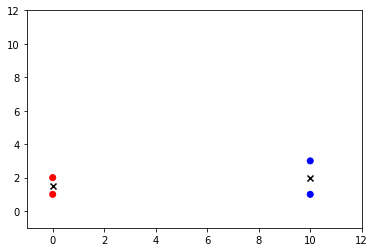

In [57]:
plt.scatter(X[:, 0], X[:, 1], c=['red', 'red', 'blue', 'blue'])
centers = np.array([[0, 1.5], [10, 2]])
plt.scatter(centers[:, 0], centers[:, 1], marker='x', c='black')
plt.xlim(-1, 12)
plt.ylim(-1, 12)

In [58]:
# We need to specify the number of clusters. I'm also inputting the initial cluster centers.
kmeans = sklearn.cluster.KMeans(n_clusters=2, init=np.array([[0, 1], [10, 3]]))
# Perform the clustering
kmeans.fit(X)
print('Cluster centers:\n', kmeans.cluster_centers_)
print('Objective function value:', kmeans.inertia_)

KMeans(algorithm='auto', copy_x=True,
    init=array([[ 0,  1],
       [10,  3]]), max_iter=300, n_clusters=2,
    n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
    tol=0.0001, verbose=0)

Cluster centers:
 [[ 0.   1.5]
 [10.   2. ]]
Objective function value: 2.5


Note that sklearn's $k$-means implementation has an option to use $k$-means++:

In [37]:
# We specify 'k-means++' for the init parameter.
kmeans = sklearn.cluster.KMeans(n_clusters=2, init='k-means++')
# Perform the clustering
kmeans.fit(X)
print('Cluster centers:\n', kmeans.cluster_centers_)
print('Objective function value:', kmeans.inertia_)

Cluster centers:
 [[ 0.   1.5]
 [10.   2. ]]
Objective function value: 2.5


By default, sklearn runs $k$-means 10 times, randomly initializing acccording to the $k$-means++ algorithm each time. It then outputs the clustering with the best objective function value.

### 2.3 $k$-means for color quantization
Now that we know how $k$-means works, let's try it out on an application: color quantization. A color image is made up of pixels that each have a red, green, and blue value. Consequently, an image might have 100,000 unique colors. If you have a lot of images and you want to store all of the colors in every image, the amount of storage space required will be huge. The idea behind color quantization is to represent images using fewer unique colors, such that the new images look as much like the original images as possible. One method for finding which colors to use in the new representations is to use $k$-means clustering. Let's try it.

This example is slightly modified from 
http://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 64  # Number of cluster centers/colors we will use to represent the image

# Load a picture of the Summer Palace
china = load_sample_image("china.jpg")

# The image is 427 (width) by 640 (height) by 3 (for RGB color channels)
print('Shape of image:', china.shape)

# Let's look at the first pixel. 
print('First pixel:', china[0, 0, :])

# Each pixel value can range from 0 to 255:
print('Smallest pixel value:', np.min(china))
print('Largest pixel value:', np.max(china))

Shape of image: (427, 640, 3)
First pixel: [174 201 231]
Smallest pixel value: 0
Largest pixel value: 255


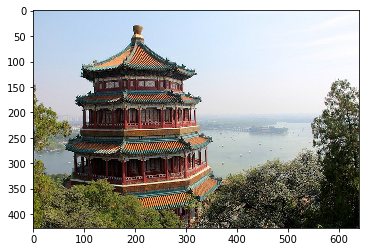

In [60]:
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Let's take a look at the image
plt.imshow(china)
plt.show()

In [61]:
# Load image and transform to a 2D numpy array, where each row is for one pixel
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

Running $k$-means on all $427\times 640 = 273,280$ pixels would take a while. Let's therefore take a sample of the pixels instead and run $k$-means on just these pixels. 

In [62]:
print("Selecting a small sub-sample of the data")
image_array_sample = shuffle(image_array, random_state=0)[:1000]  # Take a random subsample of size 1000

Selecting a small sub-sample of the data


**Exercise 9** Use Scikit-learn to fit a k-means model on this subsample with `n_colors = 64`.

In [98]:
n_colors=5

# We specify 'k-means++' for the init parameter.
kmeans = sklearn.cluster.KMeans(n_clusters=n_colors)
# Perform the clustering
kmeans.fit(image_array_sample)
print('Cluster centers:\n', kmeans.cluster_centers_)
print('Objective function value:', kmeans.inertia_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Cluster centers:
 [[0.57079108 0.51794456 0.41963489]
 [0.9014797  0.93489321 0.97542095]
 [0.12060217 0.09960041 0.07281851]
 [0.75337461 0.80237358 0.84111455]
 [0.349062   0.3182194  0.20833068]]
Objective function value: 15.618259776597656


Your code just ran $k$-means on the pixels. In other words, it clustered the pixel colors into 64 different groups. What colors did it choose? We can look!

array([0.57079108, 0.51794456, 0.41963489])

(0.0, 1.0, 0.0, 1.0)

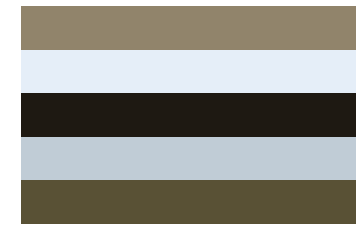

In [99]:
# First recall that each cluster center is just a vector of three numbers:
kmeans.cluster_centers_[0, :]

# Now let's plot the colors that were the cluster centers in k-means.
colors = np.expand_dims(kmeans.cluster_centers_, axis=1)
plt.axis('off')
plt.imshow(colors, aspect='auto')
plt.show()

Now we can assign each pixel in the entire image (not just the pixels we ran $k$-means on) to the nearest cluster center.

In [100]:
# Get labels (nearest cluster means) for all points
print("Predicting color indices on the full image using results from k-means")
t0 = time()
labels = kmeans.predict(image_array)
print("Done in %0.3fs." % (time() - t0))

Predicting color indices on the full image using results from k-means
Done in 0.057s.


Let's see what the image looks like when we recreate it using our $k$-means result. In the recreation, the color of each pixel is going to be the color of the nearest cluster center.

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Quantized image (64 colors, K-Means)')

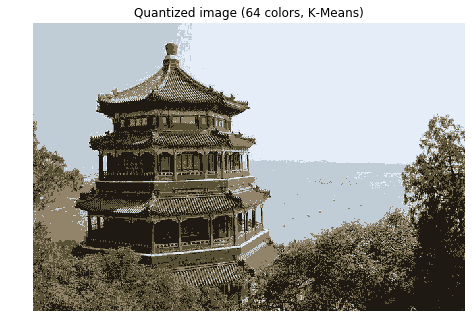

In [101]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
plt.show()

You might wonder what would happen if we just chose 64 random colors rather than 64 colors resulting from $k$-means. Let's see what happens.

In [102]:
codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print("Done in %0.3fs." % (time() - t0))

Predicting color indices on the full image (random)
Done in 0.047s.


Here is a side-by-side display of the original image and the two quantized images:

<Figure size 432x288 with 0 Axes>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Original image (96,615 colors)')

<Figure size 432x288 with 0 Axes>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Quantized image (64 colors, k-means)')

<Figure size 432x288 with 0 Axes>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Quantized image (64 colors, random)')

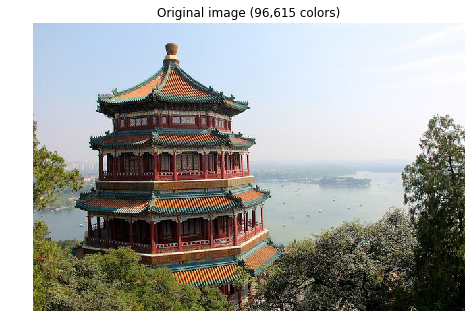

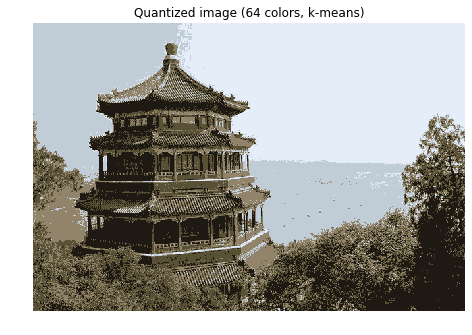

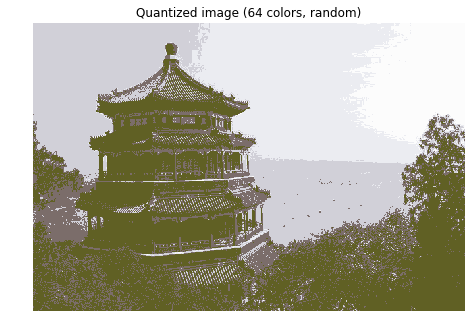

In [103]:
# Display all results, alongside original image
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (64 colors, k-means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (64 colors, random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()